# Death Cross Analysis of Bitcoins Price

Based on [Use Python & Death Cross to Determine if Bitcoins Price will Fall](https://www.youtube.com/watch?v=EvcL_hgJQSg) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

## Load Bitcoin data

In [3]:
df = pd.read_csv('BTC.csv')

Show the data

In [4]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-12-15,780.070007,781.434998,777.802002,778.088013,81580096,0,0
1,2016-12-16,778.963013,785.031982,778.963013,784.906982,83608200,0,0
2,2016-12-17,785.166016,792.508972,784.864014,790.828979,78989800,0,0
3,2016-12-18,791.007996,794.737000,788.026001,790.530029,60524400,0,0
4,2016-12-19,790.692017,793.611023,790.320007,792.713989,74886400,0,0
...,...,...,...,...,...,...,...,...
1643,2021-06-19,35854.527344,36457.796875,34933.062500,35615.871094,31207279719,0,0
1644,2021-06-20,35563.140625,36059.484375,33432.074219,35698.296875,36664034054,0,0
1645,2021-06-21,35641.144531,35721.640625,31295.935547,31676.693359,52809038594,0,0
1646,2021-06-22,31622.376953,33292.453125,28893.621094,32505.660156,58964353058,0,0


Set the date as the index

In [5]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [6]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2016-12-15,2016-12-15,780.070007,781.434998,777.802002,778.088013,81580096,0,0
2016-12-16,2016-12-16,778.963013,785.031982,778.963013,784.906982,83608200,0,0
2016-12-17,2016-12-17,785.166016,792.508972,784.864014,790.828979,78989800,0,0
2016-12-18,2016-12-18,791.007996,794.737000,788.026001,790.530029,60524400,0,0
2016-12-19,2016-12-19,790.692017,793.611023,790.320007,792.713989,74886400,0,0
...,...,...,...,...,...,...,...,...
2021-06-19,2021-06-19,35854.527344,36457.796875,34933.062500,35615.871094,31207279719,0,0
2021-06-20,2021-06-20,35563.140625,36059.484375,33432.074219,35698.296875,36664034054,0,0
2021-06-21,2021-06-21,35641.144531,35721.640625,31295.935547,31676.693359,52809038594,0,0
2021-06-22,2021-06-22,31622.376953,33292.453125,28893.621094,32505.660156,58964353058,0,0


Create a function to get the simple movinga average (SMA)

In [7]:
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

Create new columns to store the Short term SMA and Long term SMA

In [8]:
df['ShortSMA'] = SMA(df, 50)
df['LongSMA'] = SMA(df, 200)

## Plot the chart

List of columns to show

In [9]:
column_list = ['ShortSMA', 'LongSMA', 'Close']

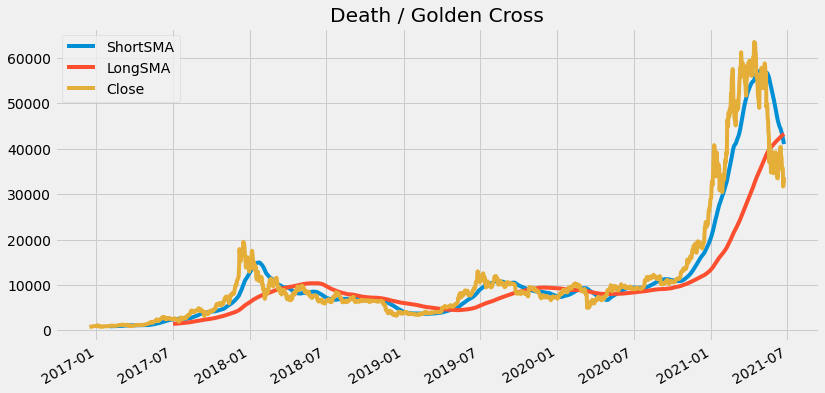

In [10]:
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Death / Golden Cross')
plt.show()

Create a function to see the dates of each death cross and golden cross within the dataset

In [11]:
def death_golden_cross():
    first_cross = 0
    # Loop through the length of the dataset 
    for i in range(0, len(df)):
        if df['ShortSMA'][i] < df['LongSMA'][i] and first_cross == 0:
            print('Death cross on day', df.index[i], ': expect the price to continue to fall')
            first_cross = 1
        elif df['ShortSMA'][i] > df['LongSMA'][i] and first_cross == 1:
            print('Golden cross on day', df.index[i], ': expect the price to continue to rise')
            first_cross = 0            

Show the dates of each golden cross and each death cross

In [12]:
death_golden_cross()

Death cross on day 2018-03-30 00:00:00 : expect the price to continue to fall
Golden cross on day 2019-04-24 00:00:00 : expect the price to continue to rise
Death cross on day 2019-10-26 00:00:00 : expect the price to continue to fall
Golden cross on day 2020-02-19 00:00:00 : expect the price to continue to rise
Death cross on day 2020-03-25 00:00:00 : expect the price to continue to fall
Golden cross on day 2020-05-21 00:00:00 : expect the price to continue to rise
Death cross on day 2021-06-19 00:00:00 : expect the price to continue to fall


**THIS IS NOT AN INVESTMENT ADVICE!**